In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Visualuzación

In [ ]:
df_metaData = pd.read_csv("./Data/metaData.csv")

In [ ]:
df_metaData[df_metaData["Variable"] == "MTO_PIA"]

,Variable,Descripción,Tipo de dato,Tamaño,Recurso relacionado,Información Adicional
35,MTO_PIA,Monto asignado de Presupuesto Institucional de...,Numérico,10,NaN,EJEMPLO: 12345.67


- **Variable:** MTO_PIA
- **Descripción:** Monto asignado de Presupuesto Institucional de Apertura.
- **Tipo de Dato:** Numérico

Eligir columnas que estén directamente relacionadas o que puedan influir en el monto asignado de Presupuesto Institucional (MTO_PIA).

Realizar un análisis de correlación para identificar qué variables están más correlacionadas con MTO_PIA. (Las variables con alta correlación pueden ser buenos predictores).


In [30]:
df = pd.read_csv("./Data/train.csv")
df1 = df.iloc[:, :36]

In [31]:
df1.describe()

,FECHA_CORTE,ANIO_EJEC,SEC_EJEC,META,CANT_META_ANUAL,CANT_META_SEM,AVAN_FISICO_ANUAL,AVAN_FISICO_SEM,SEC_FUNC,UBIGEO,MTO_PIA
count,1464.0,1464.0,1464.0,1464.000000,1464.0,1464.000000,1464.0,1464.000000,1464.000000,1464.000000,1.464000e+03
mean,20230201.0,2023.0,1674.0,12.462432,0.0,593.712432,0.0,874.536202,35.180328,126105.652322,4.745334e+04
std,0.0,0.0,0.0,7.395105,0.0,4772.404708,0.0,7136.279030,20.086763,69018.461602,1.844846e+05
min,20230201.0,2023.0,1674.0,1.000000,0.0,0.000000,0.0,0.000000,1.000000,10199.000000,0.000000e+00
25%,20230201.0,2023.0,1674.0,6.000000,0.0,4.000000,0.0,4.000000,16.000000,60199.000000,1.330000e+02
50%,20230201.0,2023.0,1674.0,12.000000,0.0,6.000000,0.0,6.000000,42.000000,140199.000000,2.316500e+03
75%,20230201.0,2023.0,1674.0,18.000000,0.0,16.000000,0.0,16.000000,52.250000,180199.000000,1.742675e+04
max,20230201.0,2023.0,1674.0,27.000000,0.0,40890.000000,0.0,61303.000000,80.000000,250199.000000,2.816373e+06


- Identificar variables relevantes: Al calcular la correlación entre MTO_PIA y las demás variables, identificamos cuáles de ellas están más fuertemente relacionadas con el monto asignado de Presupuesto Institucional (MTO_PIA). Estas variables pueden ser buenos candidatos para incluir en un modelo predictivo o para profundizar en su análisis.

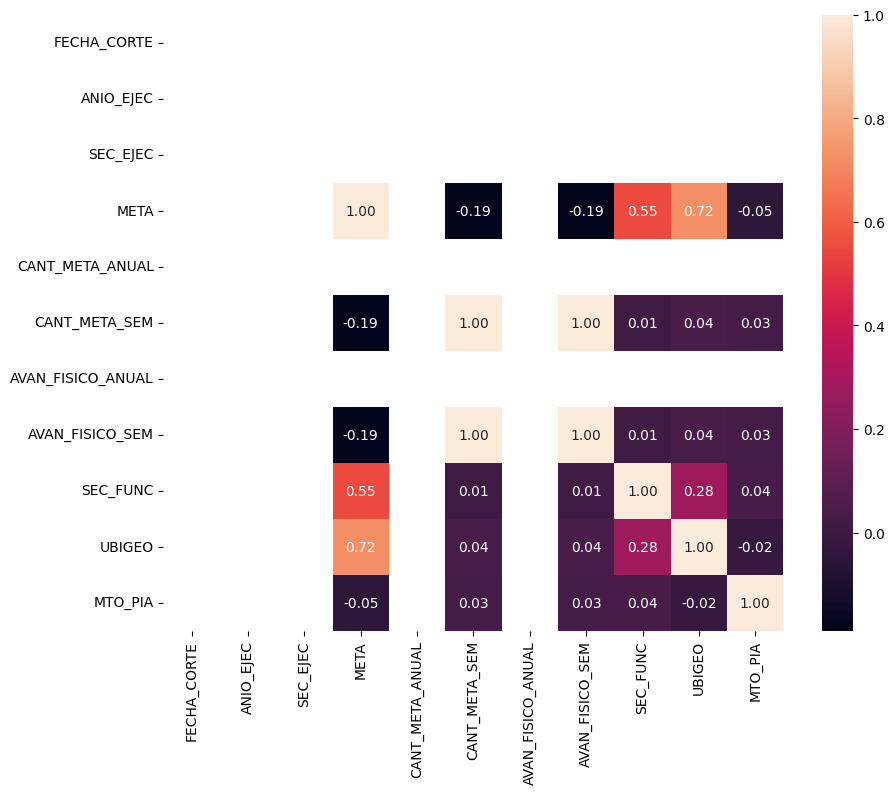

In [32]:
correlacion = df1.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f")
plt.show()

In [33]:
correlacion["MTO_PIA"].dropna()

META              -0.047390
CANT_META_SEM      0.027448
AVAN_FISICO_SEM    0.027541
SEC_FUNC           0.037538
UBIGEO            -0.017282
MTO_PIA            1.000000
Name: MTO_PIA, dtype: float64

La variable *META* a pesar de tener una correlación es solamente un código, no es relevante. *UBIGEO* representa un código de una localización geográfica, no es cuantitativa.

**Interpretación de la Correlación con 'MTO_PIA':**

- **META:** Con un coeficiente de correlación de **-0.047390**, indica una correlación negativa muy débil con 'MTO_PIA'. Esto sugiere que no hay una relación lineal fuerte entre 'META' y el monto asignado de Presupuesto Institucional.

- **CANT_META_SEM:** Tiene un coeficiente de **0.027448**, lo que implica una correlación positiva muy débil. Esto significa que a medida que 'CANT_META_SEM' aumenta, 'MTO_PIA' tiende a aumentar ligeramente, pero la relación no es fuerte.

- **AVAN_FISICO_SEM:** Con un coeficiente de **0.027541**, muestra una correlación positiva muy débil similar a 'CANT_META_SEM'. Esto indica que 'AVAN_FISICO_SEM' y 'MTO_PIA' se mueven ligeramente en la misma dirección, pero la relación es débil.

- **SEC_FUNC:** Presenta un coeficiente de **0.037538**, indicando una correlación positiva débil. Esto sugiere que 'SEC_FUNC' podría tener una influencia leve en 'MTO_PIA'.

- **UBIGEO:** Con un coeficiente de **-0.017282**, muestra una correlación negativa muy débil con 'MTO_PIA'. Esto indica que no hay una relación lineal significativa entre la ubicación geográfica y el monto asignado.

- **MTO_PIA:** Como es lógico, tiene una correlación perfecta de **1.000000** consigo mismo.

En resumen, ninguna de las variables listadas muestra una correlación fuerte con 'MTO_PIA'.


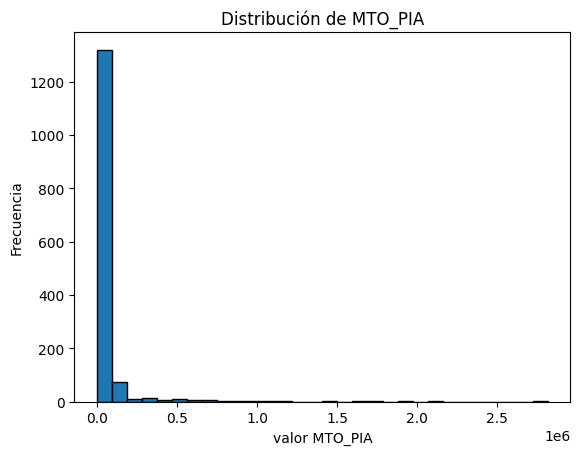

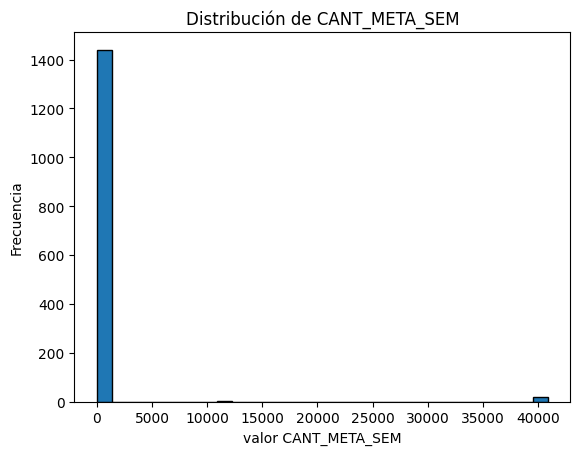

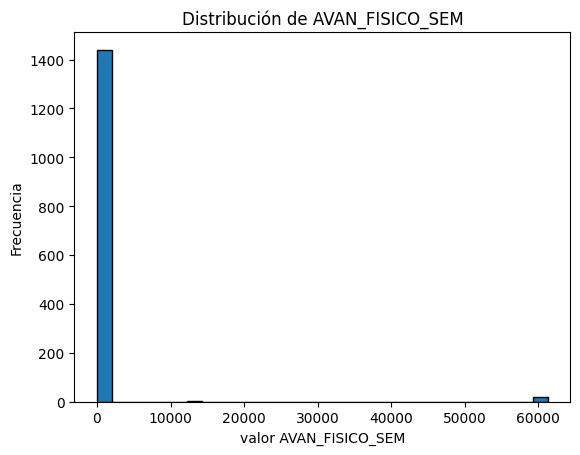

In [34]:
#Graficar distribución
features_anomalias = ["MTO_PIA", "CANT_META_SEM", "AVAN_FISICO_SEM"]
for var in features_anomalias:
  plt.hist(df1[var], bins=30, edgecolor="k")
  plt.title(f"Distribución de {var}")
  plt.xlabel(f"valor {var}")
  plt.ylabel("Frecuencia")
  plt.show()

Vemos que algunos de los features tienen una distribución bastante asímetrica, heavy tail. Podemos usar desviación estándar como una métrica para encontrar anomalias en los datos de esas variables.

El grafico de CANT_META_SEM es similar a AVAN_FISICO_SEM ya que esas variables representan metas y valor alcanzado de la meta. Vimos en la data que casi siempre la meta es alcanzada, es decir AVAN_FISICO_SEM es igual a CANT_META_SEM en la mayoria de las instancias

In [35]:
df_clean = df1
for feature in features_anomalias:
    mean = np.mean(df1[feature])
    std_dev = np.std(df1[feature])
    # 3 standard deviations del promedio
    threshold = mean + 3 * std_dev

    anomalies_index = df1[df1[feature] > threshold].index
    anomalies = (df1[feature] > threshold).sum()

    df_clean.drop(anomalies_index, inplace=True)
    print(f"Numero de anomalias en {feature}: {anomalies}")

Numero de anomalias en MTO_PIA: 28
Numero de anomalias en CANT_META_SEM: 19
Numero de anomalias en AVAN_FISICO_SEM: 3


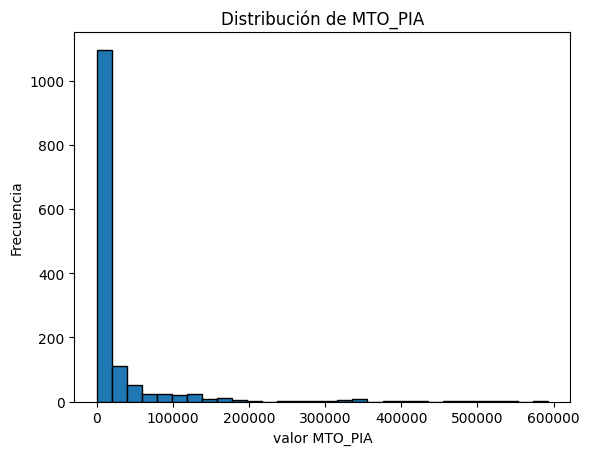

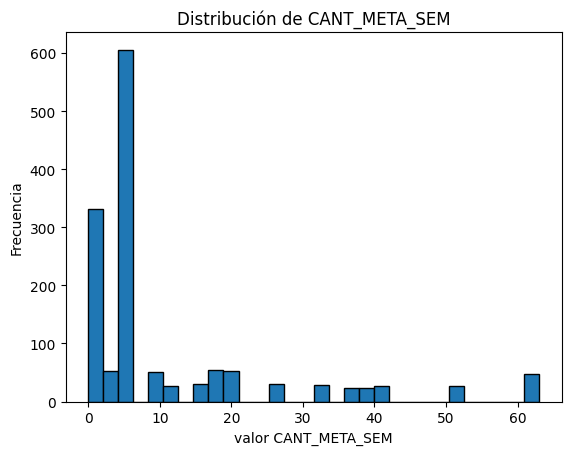

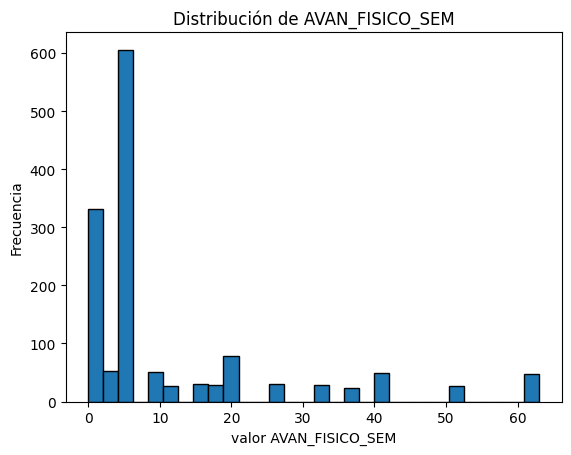

In [36]:
features_anomalias = ["MTO_PIA", "CANT_META_SEM", "AVAN_FISICO_SEM"]
for var in features_anomalias:
  plt.hist(df_clean[var], bins=30, edgecolor="k")
  plt.title(f"Distribución de {var}")
  plt.xlabel(f"valor {var}")
  plt.ylabel("Frecuencia")
  plt.show()

Probamos eliminar esas anomalias de nuestro dataset, sin embargo los resultados obtenidos en las predicciones fueron peores.

También probamos aplicar a los features que tienen heavy tail. Para intentar aplanar los valores.

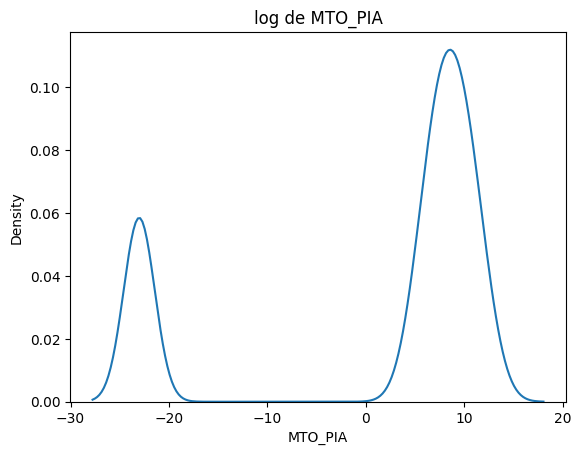

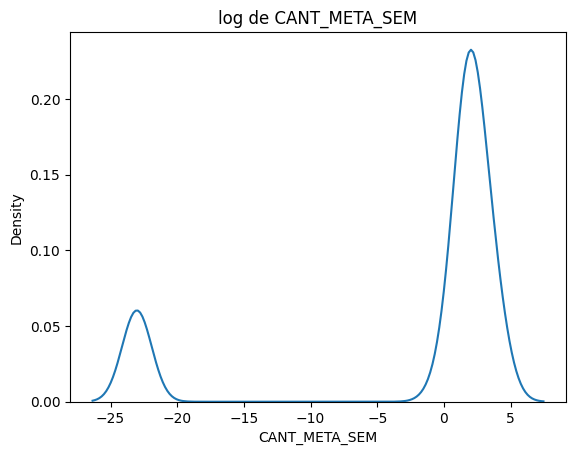

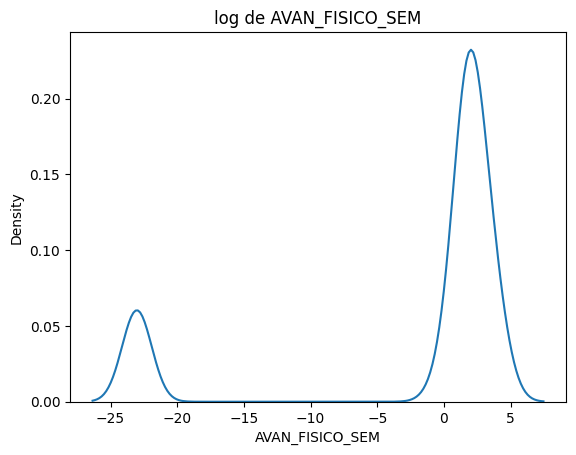

In [37]:
features_anomalias = ["MTO_PIA", "CANT_META_SEM", "AVAN_FISICO_SEM"]
small_value = 1e-10  #añado un valor chiquito para las constantes cero
df_log = df1
for col in features_anomalias:
  #aplico log
  df_log.loc[:,col] = np.log(df_log[col] + small_value)
  #graficar
  sns.kdeplot(df_log[col], bw_adjust=0.5)
  plt.title(f"log de {col}")
  plt.show()

Nuevamente vimos peores resultados en las predicciones después de aplicar logaritmo. También probamos combinaciones, aplicando logaritmo y eliminando anomalias.